In [1]:
!pip install textblob
!pip install pandas
!pip install nltk


  Obtaining dependency information for textblob from https://files.pythonhosted.org/packages/1e/d6/40aa5aead775582ea0cf35870e5a3f16fab4b967f1ad2debe675f673f923/textblob-0.19.0-py3-none-any.whl.metadata
  Obtaining dependency information for nltk>=3.9 from https://files.pythonhosted.org/packages/4d/66/7d9e26593edda06e8cb531874633f7c2372279c3b0f46235539fe546df8b/nltk-3.9.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---- ----------------------------------- 71.7/624.3 kB 1.3 MB/s eta 0:00:01
   ----------- ---------------------------- 174.1/624.3 kB 1.5 MB/s eta 0:00:01
   ----------------- ---------------------- 276.5/624.3 kB 1.9 MB/s eta 0:00:01
   ---------------------- ----------------- 358.4/624.3 kB 1.9 MB/s eta 0:00:01
   ----------------------------- ---------- 460.8/624.3 kB 1.8 MB/s eta 0:00:01
   -------------------------------- ------- 512.0/624.3 kB 1.8 MB/s eta 0:00:01
   ---------------------------------------- 624.3/

In [2]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to C:\Users\vijay
[nltk_data]     kumhar\AppData\Roaming\nltk_data...


True

In [3]:
from textblob import TextBlob
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [10]:
# You can test with this list or input manually
""""emails = [
    "I am really disappointed with the service. Please fix this issue ASAP.",
    "Thank you for the prompt support. Everything is working perfectly!",
    "I have a few questions about your pricing. Please clarify."
]"""

# You can also use input() to test live
# email = input("Enter your email message: ")

# Ask user to enter a single email message
email = input("Enter your email message here:\n")

# Store the email in a list to keep the rest of the code consistent
emails = [email]



Enter your email message here:
I am really disappointed with the service. and I don't like it.


In [11]:
def analyze_sentiment(email_text):
    # Use TextBlob
    blob = TextBlob(email_text)
    polarity = blob.sentiment.polarity

    # Use VADER
    sid = SentimentIntensityAnalyzer()
    scores = sid.polarity_scores(email_text)
    compound = scores['compound']

    # Final judgment (based on compound score)
    if compound >= 0.3:
        return "Positive"
    elif compound <= -0.3:
        return "Negative"
    else:
        return "Neutral"


In [12]:
def generate_response(sentiment):
    if sentiment == "Positive":
        return "We're thrilled to hear that! Thank you for your kind feedback."
    elif sentiment == "Negative":
        return "We apologize for the inconvenience. Our team will reach out to resolve this quickly."
    else:
        return "Thanks for reaching out! We'll get back to you shortly with more information."


In [13]:
data = []

for email in emails:
    sentiment = analyze_sentiment(email)
    response = generate_response(sentiment)
    data.append({'Email': email, 'Sentiment': sentiment, 'Response': response})

df = pd.DataFrame(data)
df


,Email,Sentiment,Response
0,I am really disappointed with the service. and...,Negative,We apologize for the inconvenience. Our team w...


In [14]:
df.to_csv("sentiment_email_responses.csv", index=False)


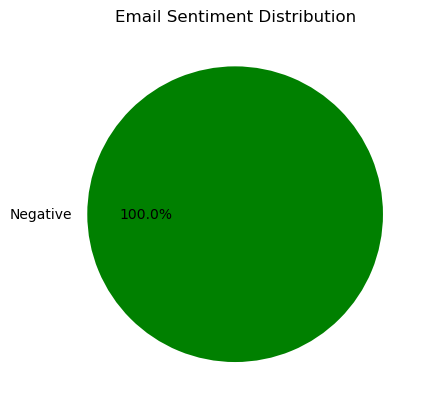

In [15]:
import matplotlib.pyplot as plt

df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['green', 'orange', 'red'])
plt.title("Email Sentiment Distribution")
plt.ylabel('')
plt.show()
